In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sys
import csv
from collections import defaultdict
import pprint
%matplotlib inline

### Read all files and save a subset into a single file

In [69]:
pp = pprint.PrettyPrinter(indent=4)

In [100]:
file_names = [ "./data/" + str(year) + ".csv" for year in range(1987,2009)]
#file_names = [ "./data/" + str(year) + "_small"+ ".csv" for year in range(2007,2009)]
file_names

['./data/1987.csv',
 './data/1988.csv',
 './data/1989.csv',
 './data/1990.csv',
 './data/1991.csv',
 './data/1992.csv',
 './data/1993.csv',
 './data/1994.csv',
 './data/1995.csv',
 './data/1996.csv',
 './data/1997.csv',
 './data/1998.csv',
 './data/1999.csv',
 './data/2000.csv',
 './data/2001.csv',
 './data/2002.csv',
 './data/2003.csv',
 './data/2004.csv',
 './data/2005.csv',
 './data/2006.csv',
 './data/2007.csv',
 './data/2008.csv']

In [18]:
file_out = "./data/flight_data.csv"

In [22]:
col_list = ['Year',
            'Month',
            'Origin',
            'Dest',
            'ArrDelay',
            'DepDelay',
            'CarrierDelay',
            'WeatherDelay',
            'NASDelay',
            'SecurityDelay',
            'LateAircraftDelay']

In [12]:
data_list = ['ArrDelay',
            'DepDelay',
            'CarrierDelay',
            'WeatherDelay',
            'NASDelay',
            'SecurityDelay',
            'LateAircraftDelay']

In [44]:
def clean_value(v):
    try:
        return float(v)
    except ValueError:
        return float(0)

In [29]:
def add_to_dict(data_dict, row):
    key = (row['Year'], row['Month'], row['Origin'], row['Dest'])
    val = defaultdict(float)
    if key not in data_dict:
        data_dict[key] = val
        val['Year'] = row['Year']
        val['Month'] = row['Month']
        val['Origin'] = row['Origin']
        val['Dest'] = row['Dest']
    else:
        val = data_dict[key]
    
    for d in data_list:
        val[d + "_cum"] += clean_value(row[d])
        val[d + "_count"] += 1
        val[d + "_max"] = max(val[d + "_max"], clean_value(row[d]))

In [88]:
def calc_mean(data_dict):
    for key, val in data_dict.iteritems():
        for d in data_list:
            try:
                val[d + "_mean"] = round(val[d + "_cum"] / val[d + "_count"],2)
            except ZeroDivisionError:
                val[d + "_mean"] = float(0)

In [72]:
def get_field_names(data_list):
    field_names = list()
    field_names.append('Year')
    field_names.append('Month')
    field_names.append('Origin')
    field_names.append('Dest')
    
    for d in data_list:
        field_names.append(d + "_mean")
        field_names.append(d + "_max")
        field_names.append(d + "_cum")
        field_names.append(d + "_count")
    return field_names

In [96]:
def process_data():
        with open(file_out, 'wb') as csv_out:
            field_names = get_field_names(data_list)
            writer = csv.DictWriter(csv_out, fieldnames = field_names)
            writer.writeheader()
            for f_raw in file_names:
                data_dict = dict()
                with open(f_raw) as csv_raw:
                    reader = csv.DictReader(csv_raw)
                    for row in reader:
                        add_to_dict(data_dict,row)                
                calc_mean(data_dict)
                for key in sorted(data_dict.iterkeys()):
                    writer.writerow(data_dict[key])

In [101]:
process_data()

In [103]:
sys.getsizeof(data_dict) / 1000000

3

In [104]:
# check results
df = pd.read_csv(file_out)

In [105]:
df.describe()

,Year,Month,ArrDelay_mean,ArrDelay_max,ArrDelay_cum,ArrDelay_count,DepDelay_mean,DepDelay_max,DepDelay_cum,DepDelay_count,...,NASDelay_cum,NASDelay_count,SecurityDelay_mean,SecurityDelay_max,SecurityDelay_cum,SecurityDelay_count,LateAircraftDelay_mean,LateAircraftDelay_max,LateAircraftDelay_cum,LateAircraftDelay_count
count,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,...,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000,861628.000000
mean,1998.473856,6.526063,6.324160,151.260878,989.609125,143.373903,7.740658,150.367429,1149.635395,143.373903,...,162.905651,143.373903,0.008904,0.810501,1.060226,143.373903,1.220085,32.857423,188.814136,143.373903
std,6.382965,3.469685,10.053078,119.424331,1839.064618,144.259586,9.427858,129.876074,1709.895421,144.259586,...,623.421699,144.259586,0.156370,6.942234,10.110038,144.259586,3.185305,69.206700,591.155758,144.259586
min,1987.000000,1.000000,-937.000000,0.000000,-17337.000000,1.000000,-180.000000,0.000000,-6376.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1993.000000,4.000000,0.800000,73.000000,49.000000,58.000000,2.930000,71.000000,200.000000,58.000000,...,0.000000,58.000000,0.000000,0.000000,0.000000,58.000000,0.000000,0.000000,0.000000,58.000000
50%,1999.000000,7.000000,5.290000,128.000000,467.000000,93.000000,6.280000,125.000000,599.000000,93.000000,...,0.000000,93.000000,0.000000,0.000000,0.000000,93.000000,0.000000,0.000000,0.000000,93.000000
75%,2004.000000,10.000000,10.550000,198.000000,1286.000000,182.000000,10.700000,195.000000,1426.000000,182.000000,...,40.000000,182.000000,0.000000,0.000000,0.000000,182.000000,0.590000,27.000000,42.000000,182.000000
max,2008.000000,12.000000,1191.000000,2598.000000,56837.000000,2543.000000,1310.000000,2601.000000,41471.000000,2543.000000,...,25003.000000,2543.000000,40.560000,533.000000,1461.000000,2543.000000,222.000000,1407.000000,26579.000000,2543.000000


In [106]:
from datetime import date

In [115]:
type(df['Month'][0])

numpy.int64

In [130]:
df['Date'] = [ date(y,m,1) for y, m in zip(df['Year'], df['Month']) ]

In [137]:
depdelay_mean = df[['Date','DepDelay_mean']].groupby('Date').mean()

In [172]:
depdelay_mean_subset = depdelay_mean[0:50]
depdelay_mean_subset2 = depdelay_mean[50:100]
depdelay_mean_subset3 = depdelay_mean[101:150]

In [174]:
x_ticks = depdelay_mean_subset.index.tolist()

In [176]:
x_labels = [ str(x) for x in x_ticks]

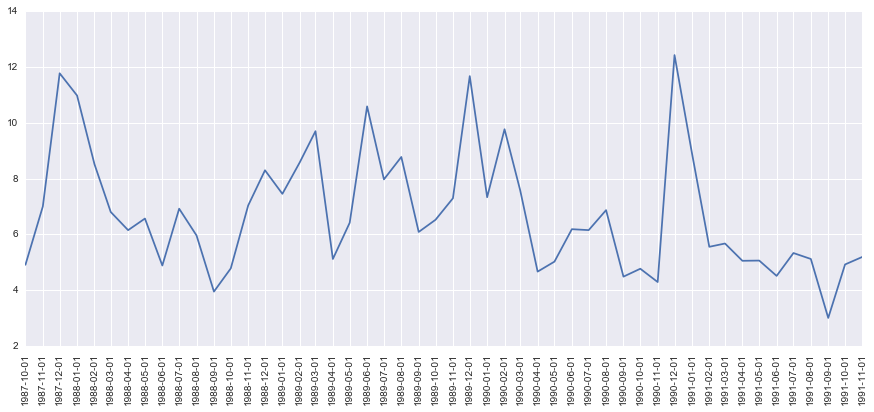

In [179]:
plt.figure(figsize=(15,6))
plt.plot(depdelay_mean_subset);
plt.xticks(x_ticks, x_labels, rotation='vertical');

### Aggregate annual data from the monthly data
Also aggregate by origin (for all destinations, group together if origin is the same)

In [190]:
file_monthly = "./data/flight_data.csv"
file_yearly = "./data/flight_data_yearly.csv"

In [251]:
data_list = ['ArrDelay',
            'DepDelay']

In [186]:
def get_field_names_yearly_origin(data_list):
    field_names = list()
    field_names.append('Year')
    field_names.append('Origin')
    
    for d in data_list:
        field_names.append(d + "_mean")
        field_names.append(d + "_max")
        field_names.append(d + "_cum")
        field_names.append(d + "_count")
    return field_names

In [194]:
def add_to_dict_yearly_origin(data_dict, row):
    key = (row['Year'], row['Origin'])
    val = defaultdict(float)
    if key not in data_dict:
        data_dict[key] = val
        val['Year'] = row['Year']
        val['Origin'] = row['Origin']
    else:
        val = data_dict[key]
    
    for d in data_list:
        val[d + "_cum"] += float(row[d + "_cum"])
        val[d + "_count"] += float(row[d + "_count"])
        val[d + "_max"] = max(val[d + "_max"], float(row[d + "_max"]))

In [189]:
def calc_mean(data_dict):
    for key, val in data_dict.iteritems():
        for d in data_list:
            try:
                val[d + "_mean"] = round(val[d + "_cum"] / val[d + "_count"],2)
            except ZeroDivisionError:
                val[d + "_mean"] = float(0)

In [252]:
def monthly_to_yearly():
        with open(file_yearly, 'wb') as csv_out:
            field_names = get_field_names_yearly_origin(data_list)
            writer = csv.DictWriter(csv_out, fieldnames = field_names)
            writer.writeheader()
            data_dict = dict()
            with open(file_monthly) as csv_in:
                reader = csv.DictReader(csv_in)
                for row in reader:
                    add_to_dict_yearly_origin(data_dict,row)                
            calc_mean(data_dict)
            for key in sorted(data_dict.iterkeys()):
                writer.writerow(data_dict[key])

In [253]:
monthly_to_yearly()

In [254]:
# check results
df = pd.read_csv(file_yearly)

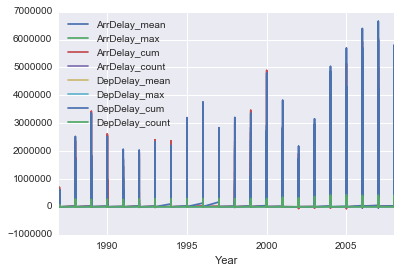

In [258]:
df.plot(x='Year');

In [223]:
#df.sort_values(by=['Year', 'DepDelay_mean'])

In [224]:
lax = df[df['Origin'] == 'LAX']
jfk = df[df['Origin'] == 'JFK']

In [203]:
lax.head()

,Year,Origin,ArrDelay_mean,ArrDelay_max,ArrDelay_cum,ArrDelay_count,DepDelay_mean,DepDelay_max,DepDelay_cum,DepDelay_count,...,NASDelay_cum,NASDelay_count,SecurityDelay_mean,SecurityDelay_max,SecurityDelay_cum,SecurityDelay_count,LateAircraftDelay_mean,LateAircraftDelay_max,LateAircraftDelay_cum,LateAircraftDelay_count
122,1987,LAX,15.30,592.0,698222.0,45646.0,12.79,1380.0,583795.0,45646.0,...,0.0,45646.0,0.0,0.0,0.0,45646.0,0.0,0.0,0.0,45646.0
361,1988,LAX,2.92,715.0,494824.0,169696.0,6.26,1401.0,1063012.0,169696.0,...,0.0,169696.0,0.0,0.0,0.0,169696.0,0.0,0.0,0.0,169696.0
597,1989,LAX,6.28,599.0,1026141.0,163487.0,8.19,1415.0,1339663.0,163487.0,...,0.0,163487.0,0.0,0.0,0.0,163487.0,0.0,0.0,0.0,163487.0
832,1990,LAX,5.99,683.0,1017515.0,169847.0,6.32,678.0,1073423.0,169847.0,...,0.0,169847.0,0.0,0.0,0.0,169847.0,0.0,0.0,0.0,169847.0
1068,1991,LAX,6.75,780.0,1059089.0,156947.0,7.35,1385.0,1153750.0,156947.0,...,0.0,156947.0,0.0,0.0,0.0,156947.0,0.0,0.0,0.0,156947.0


In [214]:
lax = lax.set_index(['Year'])

In [225]:
jfk = jfk.set_index(['Year'])

In [229]:
jfk.tail()

,Origin,ArrDelay_mean,ArrDelay_max,ArrDelay_cum,ArrDelay_count,DepDelay_mean,DepDelay_max,DepDelay_cum,DepDelay_count,CarrierDelay_mean,...,NASDelay_cum,NASDelay_count,SecurityDelay_mean,SecurityDelay_max,SecurityDelay_cum,SecurityDelay_count,LateAircraftDelay_mean,LateAircraftDelay_max,LateAircraftDelay_cum,LateAircraftDelay_count
Year,,,,,,,,,,,,,,,,,,,,,
2004,JFK,5.16,1083.0,471803.0,91501.0,8.47,1081.0,775464.0,91501.0,3.35,...,413747.0,91501.0,0.08,211.0,7378.0,91501.0,2.68,835.0,245502.0,91501.0
2005,JFK,12.21,1502.0,1244831.0,101953.0,10.46,1517.0,1066091.0,101953.0,4.28,...,656135.0,101953.0,0.06,259.0,6077.0,101953.0,4.12,1060.0,420011.0,101953.0
2006,JFK,14.82,1002.0,1636119.0,110367.0,12.37,1009.0,1364937.0,110367.0,5.16,...,839336.0,110367.0,0.04,146.0,4102.0,110367.0,4.68,798.0,516238.0,110367.0
2007,JFK,16.99,1564.0,2147426.0,126366.0,17.02,1547.0,2150510.0,126366.0,5.68,...,1020088.0,126366.0,0.07,266.0,8414.0,126366.0,6.58,602.0,831559.0,126366.0
2008,JFK,11.66,1140.0,1385834.0,118804.0,12.95,1125.0,1538176.0,118804.0,4.99,...,931958.0,118804.0,0.02,186.0,2904.0,118804.0,4.84,879.0,574734.0,118804.0


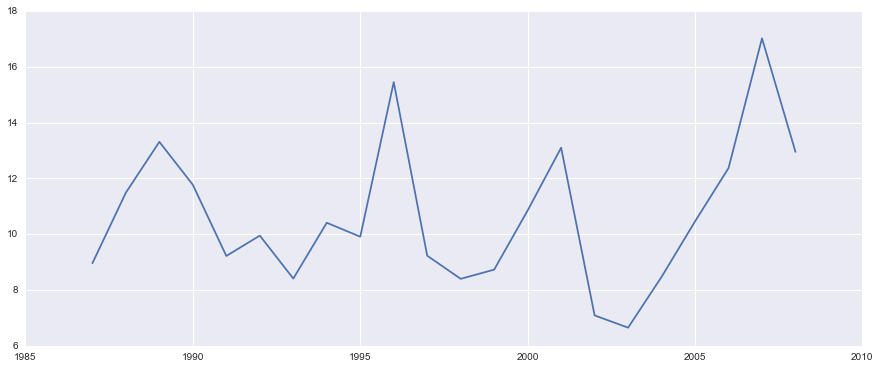

In [230]:
plt.figure(figsize=(15,6))
plt.plot(lax[['DepDelay_mean']]);

## Airport codes, longitude and latitude

In [349]:
airport_field_names_in_df = [ "Airport ID",  
                            "Name",
                               "City",
                               "Country",
                               "IATA/FAA",
                               "ICAO",
                               "Latitude",
                               "Longitude",
                               "Altitude",
                               "Timezone",
                               "DST"]

In [350]:
airport_df = pd.read_csv("./data/airports.dat", names=airport_field_names_in_df)

In [358]:
country_set = set(airport_df['City'])

In [359]:
country_list = list(country_set)

In [363]:
for c in country_list:
    if c.startswith("Guam"):
        print c

Guam


In [301]:
airport_file_in = "./data/airports.dat"
airport_file_out = "./data/airports_usa.csv"
airport_field_names_in = ["Airport ID",
                       "Name",
                       "City",
                       "Country",
                       "IATA/FAA",
                       "ICAO",
                       "Latitude",
                       "Longitude",
                       "Altitude",
                       "Timezone",
                       "DST"]

airport_field_names_out = ["Name",
                           "City",
                           "IATA/FAA",
                           "Latitude",
                           "Longitude",
                           "Country"
                            ]

In [394]:
usa_country_list = ['United States']

#since the d3 albers USA projection only handles USA states, I can't include Puerto Rico, Guam etc.

In [395]:
def process_airport():
    with open(airport_file_in) as csv_in:
        reader = csv.DictReader(csv_in, fieldnames=airport_field_names_in)
        with open(airport_file_out, "wb") as csv_out:
            writer = csv.DictWriter(csv_out, fieldnames=airport_field_names_out)
            writer.writeheader()
            for row in reader:
                if row['Country'] in usa_country_list:
                    val = dict()
                    for f in airport_field_names_out:
                        val[f] = row[f]
                    writer.writerow(val)

In [396]:
process_airport()

## merge airport longitude latitude with airport delay data

In [397]:
#get airport data into memory

airport_file_usa = "./data/airports_usa.csv"
airport_dict = {}
with open(airport_file_usa) as csv_in:
    reader = csv.DictReader(csv_in)
    for row in reader:
        key = row['IATA/FAA']
        if key != '':
            airport_dict[key] = row

In [368]:
airport_dict['OAK']

{'City': 'Oakland',
 'Country': 'United States',
 'IATA/FAA': 'OAK',
 'Latitude': '37.721278',
 'Longitude': '-122.220722',
 'Name': 'Metropolitan Oakland Intl'}

In [398]:
country_set = set()
for v in airport_dict.values():
    country_set.add(v['Country'])

country_set

{'United States'}

In [319]:
file_yearly_in = "./data/flight_data_yearly.csv"
file_yearly_geo = "./data/flight_data_yearly_geo.csv" #with longitude, latitude
data_list = ['ArrDelay',
            'DepDelay']

In [378]:
def get_field_names_yearly_origin_geo(data_list):
    field_names = list()
    field_names.append('Year')
    field_names.append('Origin')
    field_names.append('Name')
    field_names.append('City')
    field_names.append('Country')
    field_names.append("Longitude")
    field_names.append('Latitude')
    
    for d in data_list:
        field_names.append(d + "_mean")
        field_names.append(d + "_max")
        field_names.append(d + "_cum")
        field_names.append(d + "_count")
    return field_names

In [375]:
def add_geo_to_data():
    with open(file_yearly_in) as csv_in:
        reader = csv.DictReader(csv_in)
        with open(file_yearly_geo, "wb") as csv_out:
            writer = csv.DictWriter(csv_out, fieldnames=get_field_names_yearly_origin_geo(data_list))
            writer.writeheader()
            for row in reader:
                key = row['Origin']
                if key in airport_dict.keys():
                    airport = airport_dict[key]
                    row['Name'] = airport['Name']
                    row['City'] = airport['City']
                    row['Country'] = airport['Country']
                    row['Latitude'] = airport['Latitude']
                    row['Longitude'] = airport['Longitude']
                    writer.writerow(row)
                #else:
                #    print "did not find airport's geo coordinates"
                #    print row

In [399]:
add_geo_to_data()

In [401]:
geo_df = pd.read_csv(file_yearly_geo)

In [406]:
geo_df[ geo_df['Year'] == 2003].sort_values('DepDelay_mean', ascending=False)

,Year,Origin,Name,City,Country,Longitude,Latitude,ArrDelay_mean,ArrDelay_max,ArrDelay_cum,ArrDelay_count,DepDelay_mean,DepDelay_max,DepDelay_cum,DepDelay_count
3722,2003,SUX,Sioux Gateway Col Bud Day Fld,Sioux City,United States,-96.384367,42.402603,318.00,318.0,318.0,1.0,420.00,420.0,420.0,1.0
3569,2003,FMN,Four Corners Rgnl,Farmington,United States,-108.229944,36.741250,149.50,197.0,299.0,2.0,185.50,249.0,371.0,2.0
3538,2003,CYS,Cheyenne Rgnl Jerry Olson Fld,Cheyenne,United States,-104.811839,41.155722,200.00,200.0,200.0,1.0,185.00,185.0,185.0,1.0
3493,2003,BFF,Western Nebraska Regional Airport,Scottsbluff,United States,-103.596000,41.874000,93.00,93.0,93.0,1.0,131.00,131.0,131.0,1.0
3477,2003,ADK,Adak Airport,Adak Island,United States,-176.646000,51.878000,9.15,205.0,677.0,74.0,17.57,208.0,1300.0,74.0
3561,2003,EYW,Key West Intl,Key West,United States,-81.759556,24.556111,18.06,501.0,14610.0,809.0,16.82,448.0,13610.0,809.0
3683,2003,PSG,Petersburg James A. Johnson,Petersburg,United States,-132.945278,56.801667,9.02,451.0,6551.0,726.0,13.06,453.0,9485.0,726.0
3588,2003,HDN,Yampa Valley,Hayden,United States,-107.217660,40.481181,13.63,1223.0,8764.0,643.0,12.44,1230.0,7999.0,643.0
3552,2003,DUT,Unalaska,Unalaska,United States,-166.543500,53.900139,8.87,132.0,6113.0,689.0,11.41,142.0,7859.0,689.0
3665,2003,OME,Nome,Nome,United States,-165.445247,64.512203,8.06,296.0,8654.0,1074.0,11.37,303.0,12214.0,1074.0
